In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
import os
os.chdir('D://DKIT//dissertation//Dataset_of_Tomato_Leaves//plantvillage//Preprocessed_data//64//vector//')

In [3]:
#reading numpy array data
pixels = np.load('rgb_data.npy')
#reading csv file
data = pd.read_csv('rgb_data.csv')

In [4]:
features = pd.DataFrame(pixels)
features = features.values

In [5]:
features

array([[143, 147, 146, ..., 123, 113, 112],
       [178, 172, 172, ..., 138, 124, 123],
       [125, 129, 106, ...,  61,  53,  51],
       ...,
       [130, 115, 118, ..., 127, 127, 129],
       [179, 168, 176, ..., 126, 113, 122],
       [114,  99, 102, ..., 205, 191, 188]], dtype=uint8)

In [6]:
target = data['disease']

In [7]:
cat = target.unique()

In [8]:
vals = list(range(0,10))

In [9]:
for i in range(0,10):
    target.replace(to_replace=cat[i],value = vals[i],inplace = True)

In [10]:
target

0        0
1        0
2        0
3        0
4        0
        ..
14526    9
14527    9
14528    9
14529    9
14530    9
Name: disease, Length: 14531, dtype: int64

In [11]:
target = target.values

In [12]:
target = target.reshape(14531, 1)

In [13]:
target

array([[0],
       [0],
       [0],
       ...,
       [9],
       [9],
       [9]], dtype=int64)

In [14]:
#splitting the data to test and train
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(features,target, test_size=0.20, random_state=24)

In [15]:
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

In [16]:
xtrain = xtrain.reshape(xtrain.shape[0], 64, 64, 3)
xtest = xtest.reshape(xtest.shape[0], 64, 64, 3)

In [17]:
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

In [18]:
# normalizing the data to help with the training
xtrain /= 255
xtest /= 255

In [19]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
ytrain = np_utils.to_categorical(ytrain, n_classes)
ytest = np_utils.to_categorical(ytest, n_classes)

In [20]:
# building a linear stack of layers with the sequential model
gray_cnn_model = Sequential()

# convolutional layer 1
gray_cnn_model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(64, 64, 3)))

# convolutional layer 2
gray_cnn_model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
gray_cnn_model.add(MaxPool2D(pool_size=(2,2)))
gray_cnn_model.add(Dropout(0.25))
# convolutional layer 3
gray_cnn_model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
gray_cnn_model.add(MaxPool2D(pool_size=(2,2)))
gray_cnn_model.add(Dropout(0.25))

# flatten output of conv
gray_cnn_model.add(Flatten())

# hidden layer
gray_cnn_model.add(Dense(500, activation='relu'))
gray_cnn_model.add(Dropout(0.4))
gray_cnn_model.add(Dense(250, activation='relu'))
gray_cnn_model.add(Dropout(0.3))
# output layer
gray_cnn_model.add(Dense(10, activation='softmax'))

# compiling the sequential model
gray_cnn_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [21]:
gray_cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 50)        1400      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 75)        33825     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 75)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 75)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 125)       84500     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 125)      0         
 2D)                                                    

In [22]:
# training the model for 10 epochs
test_run = gray_cnn_model.fit(xtrain, ytrain, epochs=10, validation_data=(xtest, ytest))

Epoch 1/10
364/364 [==============================] - 176s 481ms/step - loss: 1.2422 - accuracy: 0.5603 - val_loss: 0.7362 - val_accuracy: 0.7420
Epoch 2/10
364/364 [==============================] - 187s 514ms/step - loss: 0.6051 - accuracy: 0.7910 - val_loss: 0.5958 - val_accuracy: 0.7994
Epoch 3/10
364/364 [==============================] - 193s 530ms/step - loss: 0.4715 - accuracy: 0.8362 - val_loss: 0.3279 - val_accuracy: 0.8896
Epoch 4/10
364/364 [==============================] - 219s 602ms/step - loss: 0.3690 - accuracy: 0.8725 - val_loss: 0.4306 - val_accuracy: 0.8473
Epoch 5/10
364/364 [==============================] - 195s 535ms/step - loss: 0.3193 - accuracy: 0.8925 - val_loss: 0.3162 - val_accuracy: 0.8944
Epoch 6/10
364/364 [==============================] - 169s 464ms/step - loss: 0.2780 - accuracy: 0.9080 - val_loss: 0.2624 - val_accuracy: 0.9119
Epoch 7/10
364/364 [==============================] - 169s 464ms/step - loss: 0.2489 - accuracy: 0.9159 - val_loss: 0.2785 -

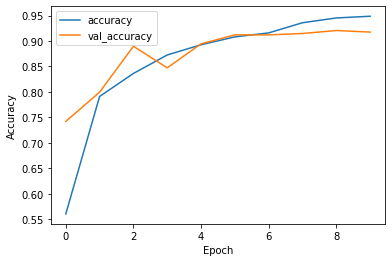

In [23]:
import matplotlib.pyplot as plt
plt.plot(test_run.history['accuracy'], label='accuracy')
plt.plot(test_run.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
score = gray_cnn_model.evaluate(xtest, ytest, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.2817685008049011
Test accuracy: 0.91744065284729


In [25]:
pred = gray_cnn_model.predict(xtest) 
pred = np.argmax(pred, axis = 1)
label = np.argmax(ytest,axis = 1)

91/91 [==============================] - 9s 101ms/step


In [26]:
#importing classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
print(classification_report(label, pred))
print(confusion_matrix(label, pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       345
           1       0.65      0.73      0.69       153
           2       0.96      0.97      0.96       234
           3       0.92      0.82      0.87       309
           4       0.86      0.86      0.86       145
           5       0.87      0.86      0.87       293
           6       0.91      0.88      0.89       240
           7       0.73      0.96      0.83        54
           8       0.96      1.00      0.98       854
           9       1.00      0.94      0.97       280

    accuracy                           0.92      2907
   macro avg       0.88      0.89      0.89      2907
weighted avg       0.92      0.92      0.92      2907

[[323  11   3   2   0   1   2   0   3   0]
 [  6 111   0  11   3   8   7   1   6   0]
 [  0   1 226   2   0   0   4   1   0   0]
 [  2  29   3 254   6  11   0   1   3   0]
 [  0   4   1   2 124   8   1   1   4   0]
 [  1   4   0   4  11 252 